<a href="https://colab.research.google.com/github/Sujal3013/DeepLearning_NR1/blob/main/Potato_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data collection

In [9]:
!unzip Potato_disease.zip

Archive:  Potato_disease.zip
replace Potato_disease/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Tensorflow library import

In [10]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [11]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=40

Data Processing

In [12]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Potato_disease",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [13]:
classes_names=dataset.class_names
classes_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [14]:
len(dataset) #  68*32=total images (2152 ~ 2176)

68

(256, 256, 3)


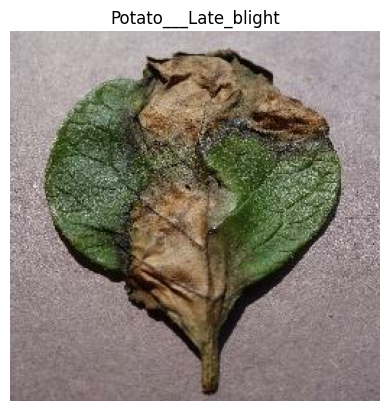

In [15]:
for image_batch,label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8")) #visualize the image and convert ot int from float
  plt.axis("off")
  plt.title(classes_names[label_batch[0]])
  print(image_batch[0].shape)

In [8]:
len(dataset)

68

Creating train and test dataset

70% ==> training

30% ==> 15% validation,15% test

In [16]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [17]:
train_set=dataset.take(54)
len(train_set)

54

In [18]:
test_set=dataset.skip(54)

In [19]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [20]:
val_set=test_set.take(6)
test_set=test_set.skip(6)

In [21]:
train_set=train_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_set=test_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_set=val_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

Image scaling and Resizing layer

In [22]:
Resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

Data Augmentation layer

In [24]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.3),
])

In [26]:
image_size=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)

In [28]:

model=models.Sequential([
    Resize_and_rescale,
    data_augmentation,
    layers.Conv2D(40,(3,3),activation='relu',input_shape=image_size),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(40,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax'),

])
model.build(input_shape=image_size)

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 40)        1120      
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 40)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 128)       46208     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 128)        0         
 2D)                                                  

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [33]:
history=model.fit(
    train_set,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_set
)

Epoch 1/40
54/54 [==============================] - 6s 107ms/step - loss: 0.5856 - accuracy: 0.7419 - val_loss: 0.4376 - val_accuracy: 0.8177
Epoch 2/40
54/54 [==============================] - 6s 113ms/step - loss: 0.3861 - accuracy: 0.8461 - val_loss: 0.2837 - val_accuracy: 0.8958
Epoch 3/40
54/54 [==============================] - 6s 114ms/step - loss: 0.2688 - accuracy: 0.8935 - val_loss: 0.2746 - val_accuracy: 0.9010
Epoch 4/40
54/54 [==============================] - 6s 106ms/step - loss: 0.2231 - accuracy: 0.9184 - val_loss: 0.1635 - val_accuracy: 0.9427
Epoch 5/40
54/54 [==============================] - 6s 105ms/step - loss: 0.1778 - accuracy: 0.9398 - val_loss: 0.1306 - val_accuracy: 0.9479
Epoch 6/40
54/54 [==============================] - 6s 107ms/step - loss: 0.1713 - accuracy: 0.9375 - val_loss: 0.1450 - val_accuracy: 0.9479
Epoch 7/40
54/54 [==============================] - 6s 108ms/step - loss: 0.1524 - accuracy: 0.9392 - val_loss: 0.1331 - val_accuracy: 0.9740
Epoch 

In [36]:
scores= model.evaluate(test_set)

8/8 [==============================] - 2s 84ms/step - loss: 0.0408 - accuracy: 0.9871


In [37]:
scores

[0.040834978222846985, 0.9870689511299133]

In [38]:
history

In [39]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 54}

In [40]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

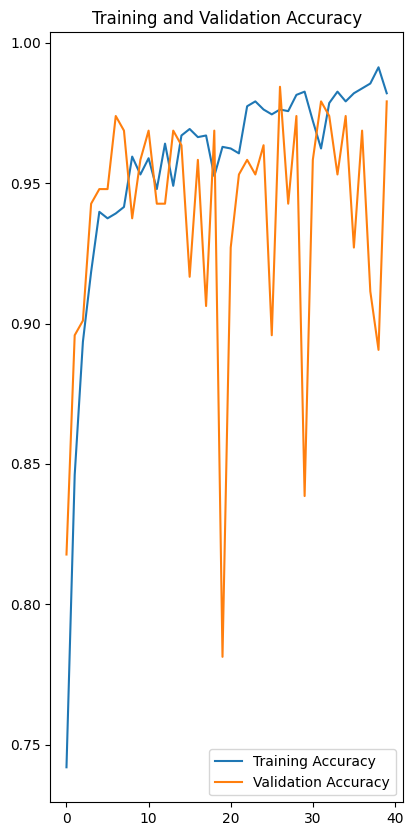

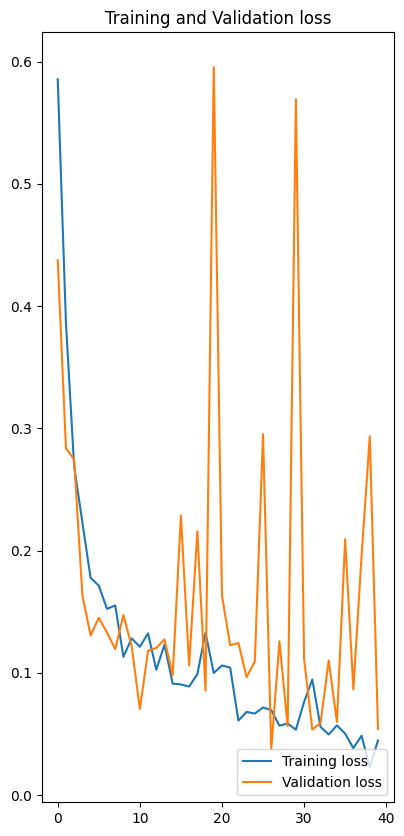

In [43]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')

first image to predict
first image's actual label: Potato___Late_blight
1/1 [==============================] - 0s 39ms/step
Model's prediction: Potato___Late_blight


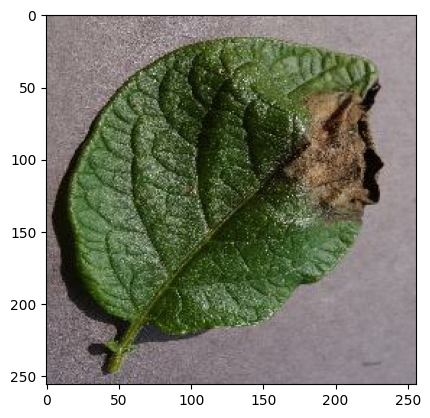

In [52]:
import numpy
for image_batch,label_batch in test_set.take(1):

  first_image=image_batch[0].numpy().astype('uint8')
  first_label=label_batch[0].numpy()
  print("first image to predict")
  plt.imshow(first_image)
  print("first image's actual label:",classes_names[first_label])

  batch_prediction=model.predict(image_batch)
  print("Model's prediction:",classes_names[numpy.argmax(batch_prediction[0])])

In [53]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)

  predictions=model.predict(img_array)

  predicted_class=classes_names[numpy.argmax(predictions[0])]
  confidence=round(100*(numpy.max(predictions[0])),2)
  return predicted_class,confidence

In [55]:
model_version=1
model.save(f"contents/Potato_disease/model_1.h5")